In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing


In [14]:
path_treino = 'data\cars_train.csv'
path_test = 'data\cars_test.csv'
dados_treino = pd.read_csv(path_treino)
dados_treino = dados_treino.drop(columns=['id', 'num_fotos','elegivel_revisao','dono_aceita_troca','veiculo_alienado','entrega_delivery'])
dados_treino

,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,...,estado_vendedor,anunciante,troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017,67772,CVT,4,Sedã,N,...,São Paulo (SP),Pessoa Física,False,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,74732.59008
1,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017,62979,Automática,4,Sedã,N,...,Minas Gerais (MG),Pessoa Física,False,NaN,NaN,IPVA pago,NaN,NaN,NaN,81965.33263
2,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019,44070,Automática,4,Sedã,N,...,São Paulo (SP),Loja,False,NaN,NaN,NaN,NaN,NaN,NaN,162824.81450
3,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015,85357,Automática,4,Picape,N,...,São Paulo (SP),Loja,True,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,123681.35890
4,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015,71491,Automática,4,Utilitário esportivo,N,...,Rio de Janeiro (RJ),Pessoa Física,False,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,82419.76389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO,2021,2021,8150,Automática,4,Picape,N,...,Goiás (GO),Pessoa Física,False,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,403015.28960
29580,VOLKSWAGEN,POLO,1.0 200 TSI HIGHLINE AUTOMÁTICO,2020,2020,17987,Automática,4,Picape,N,...,Paraná (PR),Pessoa Física,False,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,NaN,88978.08050
29581,TOYOTA,HILUX,2.8 SRX 4X4 CD 16V DIESEL 4P AUTOMÁTICO,2019,2019,44742,Automática,4,Picape,N,...,Bahia (BA),Pessoa Física,False,NaN,NaN,NaN,NaN,NaN,NaN,218807.64870
29582,PEUGEOT,2008,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,2021,2022,35376,Automática,4,Sedã,N,...,São Paulo (SP),Loja,False,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,68495.99069


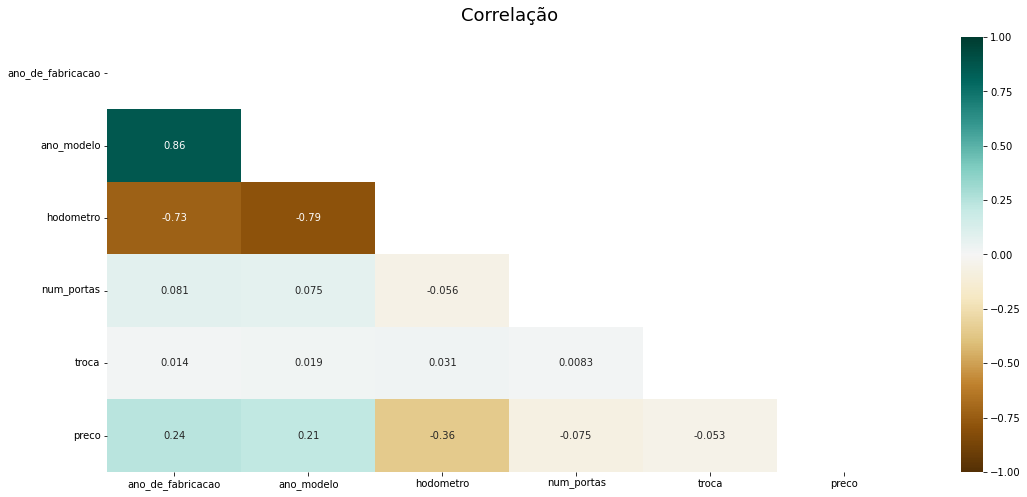

In [15]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
mask = np.triu(np.ones_like(dados_treino.corr(), dtype=bool))
heatmap = sns.heatmap(dados_treino.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

Modelo de regreção: Primeiro vamos escolher os dados para o modelo de regreção. 'ano_de_fabricacao' e 'hodometro' são os unicos atributos extensivos do dataset, o número de portas será tratado como classificatório e também o ano do modelo, pois este se trata de uma característica intrínsica do carro. Informações como 'id' e 'num_fotos' são relevantes apenas ao setor de vendas

In [16]:
dados_treino_regreção = dados_treino[['ano_de_fabricacao','hodometro','preco']]
#vamos trasnformar o ano de fabricação em idade do carro
dados_treino_regreção

,ano_de_fabricacao,hodometro,preco
0,2017,67772,74732.59008
1,2017,62979,81965.33263
2,2018,44070,162824.81450
3,2013,85357,123681.35890
4,2013,71491,82419.76389
...,...,...,...
29579,2021,8150,403015.28960
29580,2020,17987,88978.08050
29581,2019,44742,218807.64870
29582,2021,35376,68495.99069


In [30]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = dados_treino_regreção.drop('preco',axis=1)
Y = dados_treino_regreção['preco']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

lr = LinearRegression()
lr.fit(X_train,y_train)

Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)

mae_test = mean_absolute_error(y_test, Y_predict_test)
r2_test = r2_score(y_test, Y_predict_test)
print( 'mean_squared_error Y_test: ', mae_test)
print( 'r2_score Y_test: ', r2_test)

mae_train = mean_absolute_error(y_train, Y_predict_train)
r2_train = r2_score(y_train, Y_predict_train)

print( 'mean_squared_error Y_train : ', mae_train)
print( 'r2_score Y_train : ', r2_train)

mean_squared_error Y_test:  55613.98837228993
r2_score Y_test:  0.13049813916739816
mean_squared_error Y_train :  55563.21335379658
r2_score Y_train :  0.1298582806455899
